In [2]:
import requests as r

uvicorn main:api --reload --port 8000

## Parte 1

### 1. Crie uma aplicação simples em FastAPI que utilize o modelo GPT-2 da HuggingFace para gerar textos a partir de uma entrada fornecida via requisição HTTP. 

O aplicativo deve:

- Receber uma frase de entrada como JSON.
- Utilizar a biblioteca transformers do HuggingFace para gerar um texto de saída.
- Retornar o texto gerado em uma resposta HTTP.

O que é esperado:

- O aplicativo deve gerar uma continuação de texto a partir de uma frase de entrada e retornar a resposta formatada como JSON.

In [ ]:
url = 'http://127.0.0.1:8000/gpt2/generate'
response = r.get(url,params={'text': 'LLMs are computationally expensive'})
data = response.json()
data

{'input': 'LLMs are computationally expensive',
 'generated_text': 'LLMs are computationally expensive and require special software components. We want to provide the same performance for our users, and we wanted to make sure that we were providing the best possible support for our customers.\n\nWe are going to use the new pricing model that has been developed by our partner in the development of Ethereum. It will be a new feature that will allow us to charge as much as our customers are willing to pay.\n\nWe are going to offer a full system to make sure'}

### 2. Crie um aplicativo FastAPI que utiliza o modelo de tradução Helsinki-NLP/opus-mt-en-fr da HuggingFace para traduzir textos do inglês para o francês. 

A aplicação deve:

- Receber um texto em inglês via uma requisição HTTP.
- Traduzir o texto para o francês utilizando o modelo de tradução.
- Retornar o texto traduzido em uma resposta JSON.

O que é esperado:

- A API deve receber um texto em inglês e retornar sua tradução para o francês, processando tanto frases curtas quanto textos mais longos.

In [21]:
url = 'http://127.0.0.1:8000/nlp/translate'
response = r.get(url,params={'text': 'The books on the table are mine','language':'fr'})
data = response.json()
data

{'texto_original': 'The books on the table are mine',
 'language': 'fr',
 'texto_traduzido': 'Les livres sur la table sont à moi'}

In [22]:
url = 'http://127.0.0.1:8000/nlp/translate'
long_text_exemple = 'The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering. See the task summary for examples of use.'
response = r.get(url,params={'text': long_text_exemple,'language':'fr'})
data = response.json()
data

{'texto_original': 'The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering. See the task summary for examples of use.',
 'language': 'fr',
 'texto_traduzido': "Les pipelines sont un excellent moyen d'utiliser des modèles pour l'inférence. Ces pipelines sont des objets qui absorbent la plupart du code complexe de la bibliothèque, offrant une API simple dédiée à plusieurs tâches, y compris la reconnaissance des entités nommées, la modélisation du langage masqué, l'analyse du sentiment, l'extraction des fonctionnalités et la réponse aux questions."}

### 3. Com base na API desenvolvida na Questão 2 (Parte1), explique as principais limitações do modelo de tradução utilizado. 

Enumere e discuta:

- Limitações quanto à precisão da tradução.
- Desafios de tempo de resposta e desempenho em grande escala.
- Restrições de custo e escalabilidade.
- Limitações na tradução de gírias, expressões idiomáticas ou linguagem de contexto.

**R.:** Conheciment/emtendimento em francês é limitado para avaliar com clareza esse modelo em específico, contudo, LLMs não compreendem contexto e portanto, tendem a realizar traduções literais, o que as torna bem deficientes na localização dos textos, que difere de uma tradução literal.

O tempo de resposta para um texto mais longo foi um pouco mais que o dobro para a amostra pequena em um computador de uso pessoal, para um conversação em tempo real o tempo de resposta ainda é alto, contudo, para executar traduções assíncronas está bem razoável.

### 4. Com base no modelo GPT-2 utilizado na Questão 1 (Parte 1), explique as principais limitações do modelo no contexto da geração de texto. 

Discuta:

- A coerência do texto gerado.
- Possíveis falhas ou incoerências geradas por LLMs.
- Desempenho e questões de latência.
- Limitações na geração de conteúdo apropriado.

**R.:** O GPT2 é um modelo que funciona em máquinas domésticas, contudo, tende a alucinar muito fácilmente e cometer diversas incoerências e/ou inventar premissas e seguir a partir delas na geração da resposta, como por exemplo, começar a falar de ethereum sem nenhum motivo.

Quanto a latência e desempenho geral, para um chat, a espera de 2.5s não me parece problemático, ao menos não tão problemático quanto as alucinações.

## Parte 2

### 1. Desenvolva um protótipo utilizando LangChain que simule um chatbot simples com Fake LLM. 

A aplicação deve:

- Receber um input de texto via FastAPI.
- Retornar uma resposta simulada pelo Fake LLM.

O que é esperado:

- O protótipo deve simular um chatbot básico que responde a perguntas pré-definidas. 
- A arquitetura deve ser simples, e você deve explicar a importância de usar Fake LLM para testes rápidos. 
- Desenhe um diagrama simples da arquitetura do aplicativo, detalhando as principais etapas do fluxo de dados.

In [55]:
url = 'http://127.0.0.1:8000/fake_llm/chat'
response = r.get(url,params={'msg': 'oi'})
data = response.json()
data

{'response': 'Olá!'}

In [56]:
response = r.get(url,params={'msg': 'Tudo bem?'})
data = response.json()
data

{'response': 'Tudo e com você?'}

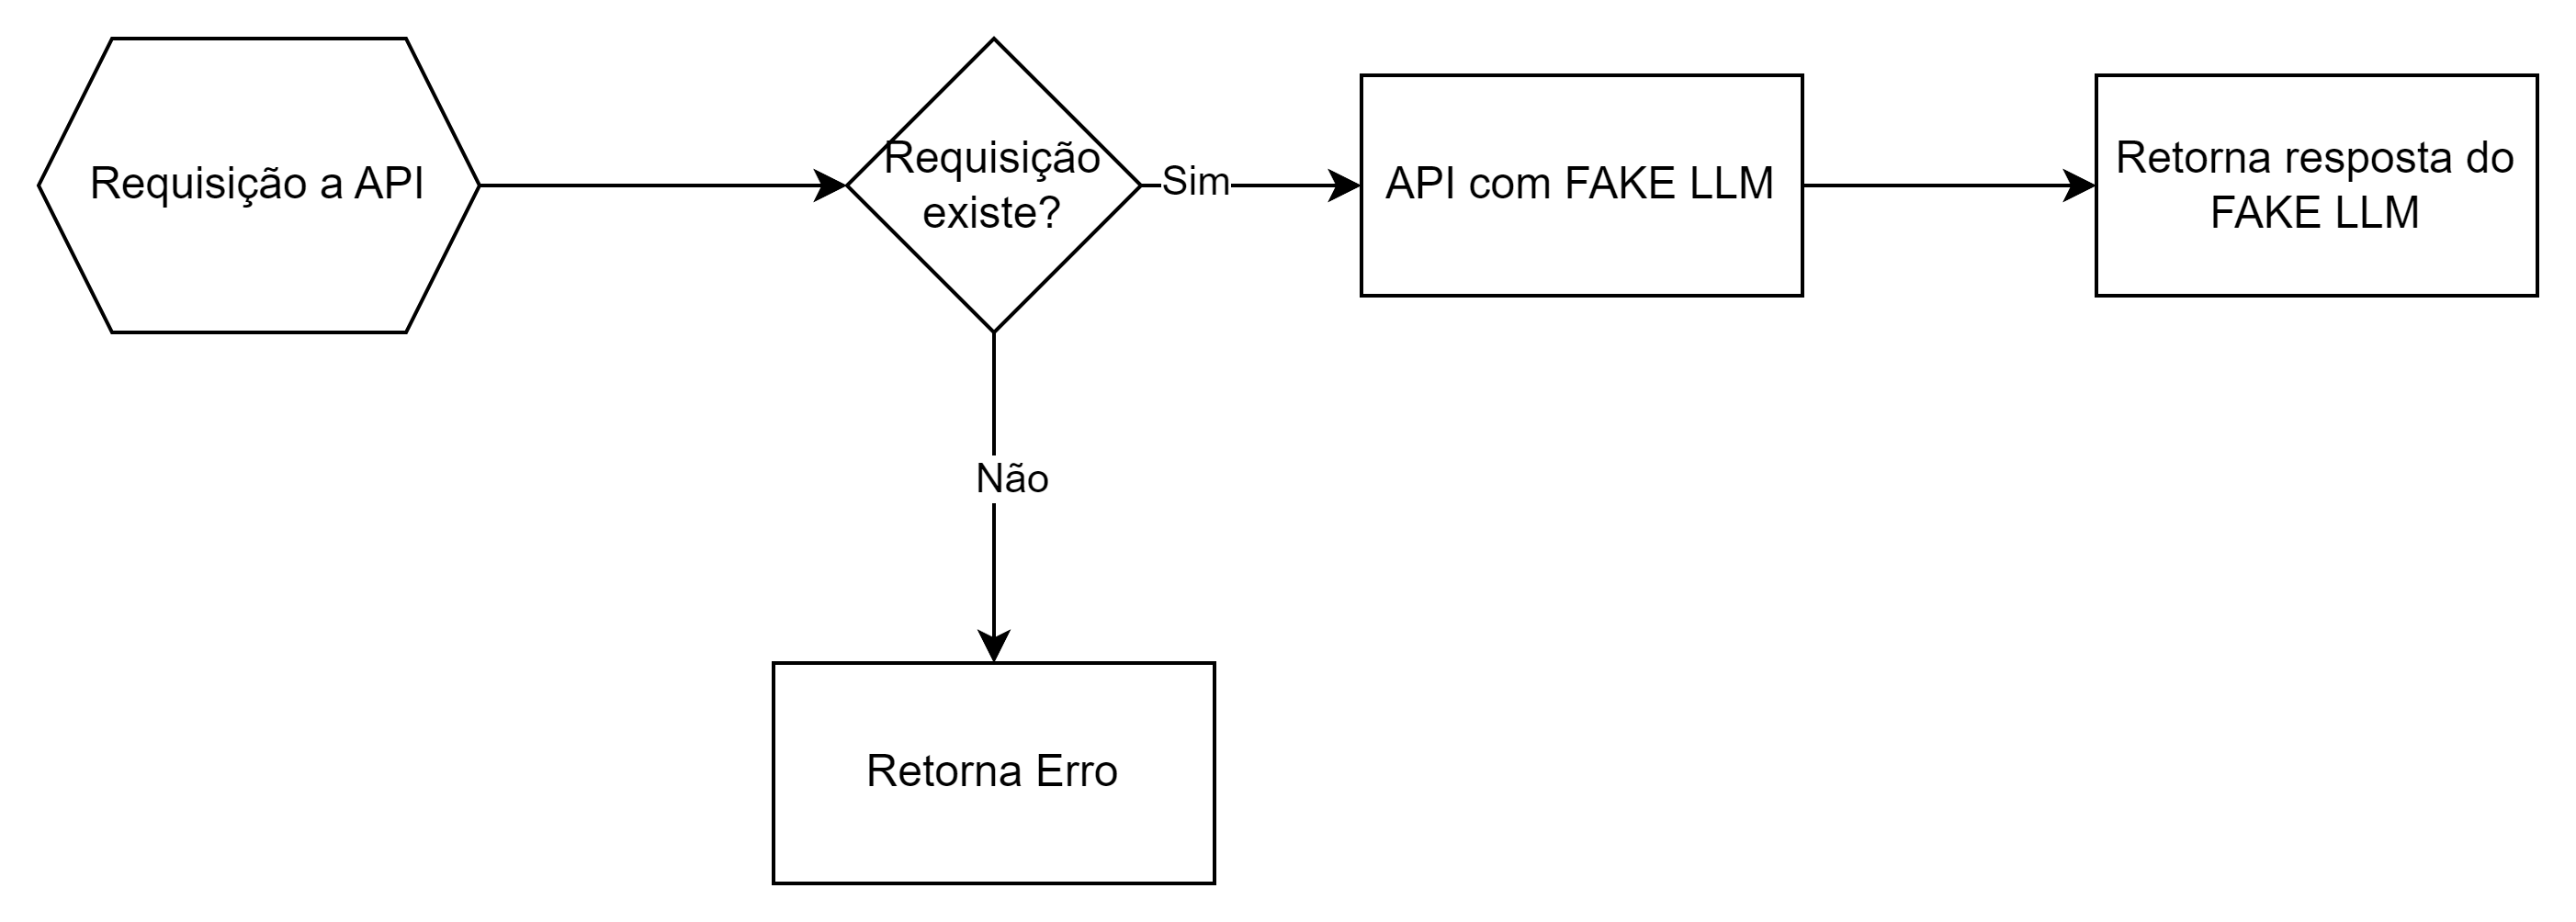

### 2. Desenvolva um aplicativo que utilize LangChain para integrar a API da OpenAI.

O aplicativo deve:

- Receber um texto em inglês via FastAPI.
- Traduzir o texto para o francês utilizando um modelo da OpenAI via LangChain.
- Retornar o texto traduzido em uma resposta JSON.

O que é esperado:

- O aplicativo deve funcionar como uma API de tradução, semelhante à questão 2 (Parte 1), mas utilizando a OpenAI via LangChain. 
- A aplicação deve gerenciar as chamadas à API da OpenAI e retornar a tradução com baixa latência.
- Forneça um diagrama da arquitetura da aplicação, destacando os componentes principais, como FastAPI, LangChain, e OpenAI.

In [8]:
url = 'http://127.0.0.1:8000/gemini/translate'
response = r.get(url,params={'totranslate': 'The books on the table are mine'})
data = response.json()
data

{'texto_original': 'The books on the table are mine',
 'texto_traduzido': 'Les livres sur la table sont à moi.\n'}

In [23]:
url = 'http://127.0.0.1:8000/gemini/translate'
long_text_exemple = 'The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering. See the task summary for examples of use.'
response = r.get(url,params={'totranslate': long_text_exemple})
data = response.json()
data

{'texto_original': 'The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering. See the task summary for examples of use.',
 'texto_traduzido': "Les pipelines sont un moyen simple et efficace d'utiliser des modèles pour l'inférence. Ces pipelines sont des objets qui abstraient la plupart du code complexe de la bibliothèque, offrant une API simple dédiée à plusieurs tâches, notamment la reconnaissance d'entités nommées, le masquage de langage, l'analyse de sentiments, l'extraction de caractéristiques et la réponse aux questions.  Voir le résumé des tâches pour des exemples d'utilisation.\n"}

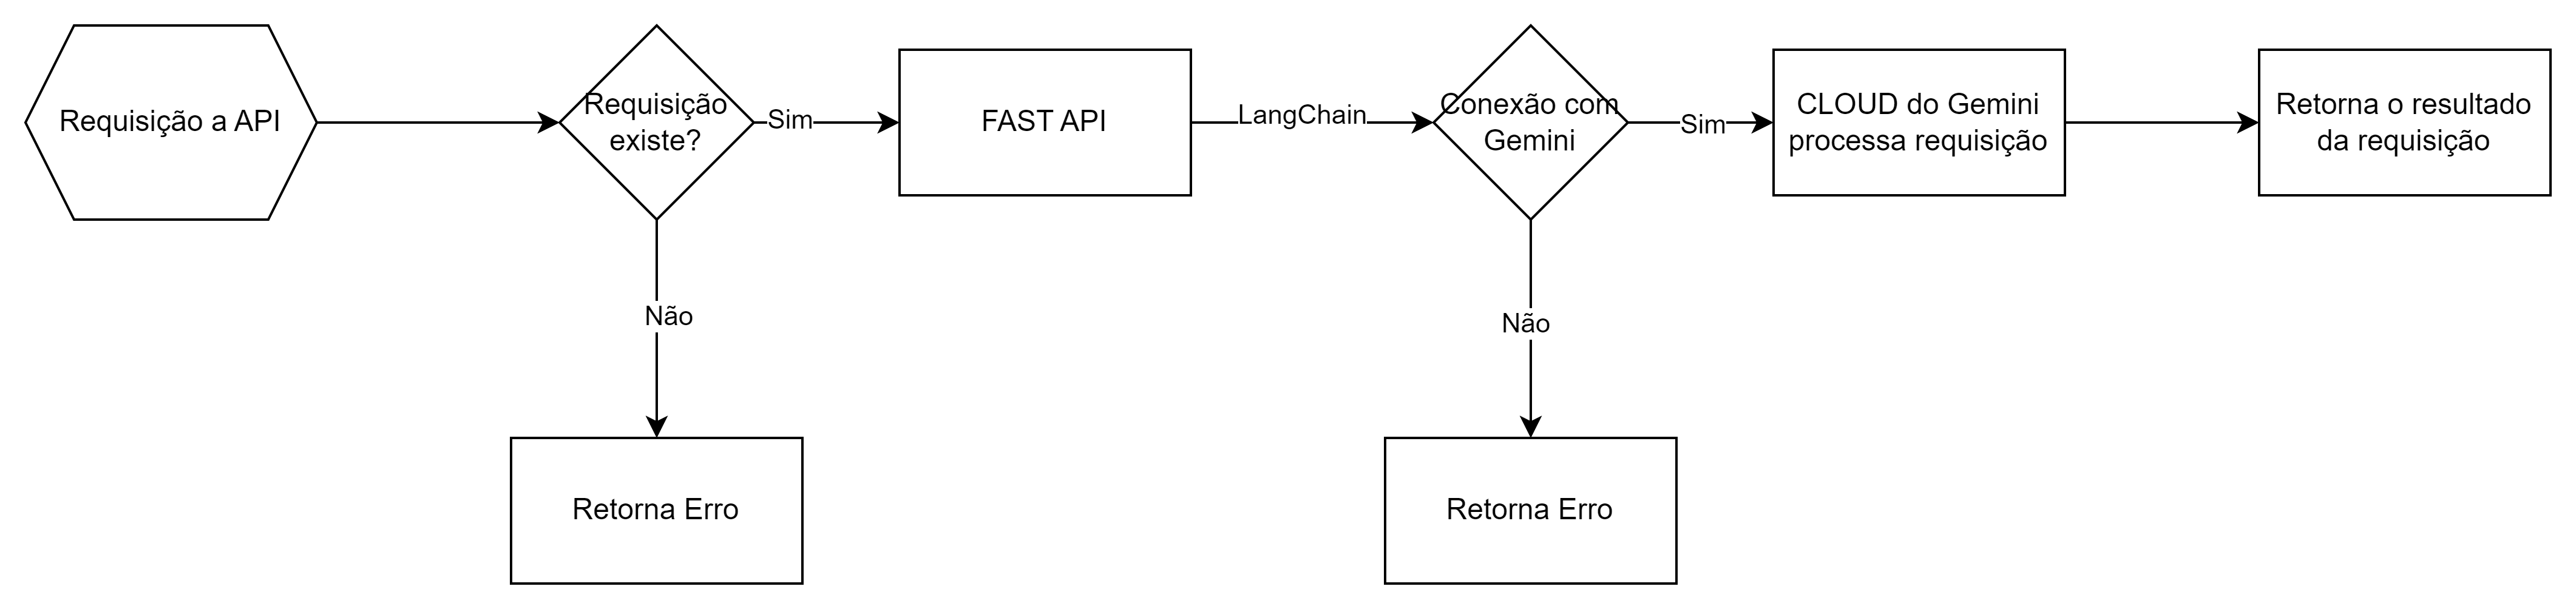

### 3. Crie uma API semelhante à Questão 2 (Parte 2), mas que utilize o modelo Helsinki-NLP/opus-mt-en-de da HuggingFace para traduzir textos do inglês para o alemão. 

A aplicação deve:

- Receber um texto em inglês via FastAPI.
- Utilizar o LangChain para gerenciar as chamadas ao modelo HuggingFace.
- Retornar o texto traduzido para o alemão como resposta JSON.

O que é esperado:

- O objetivo é que a aplicação funcione de maneira semelhante às Questões 2 (Parte 1) e 2 (Parte 2), mas desta vez integrando LangChain com HuggingFace. 
- O modelo a ser utilizado deve ser o Helsinki-NLP/opus-mt-en-de.
- Forneça um diagrama detalhado da arquitetura da aplicação, destacando as interações entre FastAPI, LangChain, e HuggingFace.

In [19]:
url = 'http://127.0.0.1:8000/nlp/translate'
response = r.get(url,params={'text': 'The books on the table are mine','language':'de'})
data = response.json()
data

{'texto_original': 'The books on the table are mine',
 'language': 'de',
 'texto_traduzido': 'Die Bücher auf dem Tisch sind meine'}

In [20]:
url = 'http://127.0.0.1:8000/nlp/translate'
long_text_exemple = 'The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering. See the task summary for examples of use.'
response = r.get(url,params={'text': long_text_exemple,'language':'de'})
data = response.json()
data

{'texto_original': 'The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering. See the task summary for examples of use.',
 'language': 'de',
 'texto_traduzido': 'Die Pipelines sind eine großartige und einfache Möglichkeit, Modelle für die Schlussfolgerung zu verwenden. Diese Pipelines sind Objekte, die die meisten komplexen Code aus der Bibliothek abstrahieren und eine einfache API anbieten, die mehreren Aufgaben gewidmet ist, einschließlich Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction und Question Answering. Siehe die Aufgabenübersicht für Anwendungsbeispiele.'}

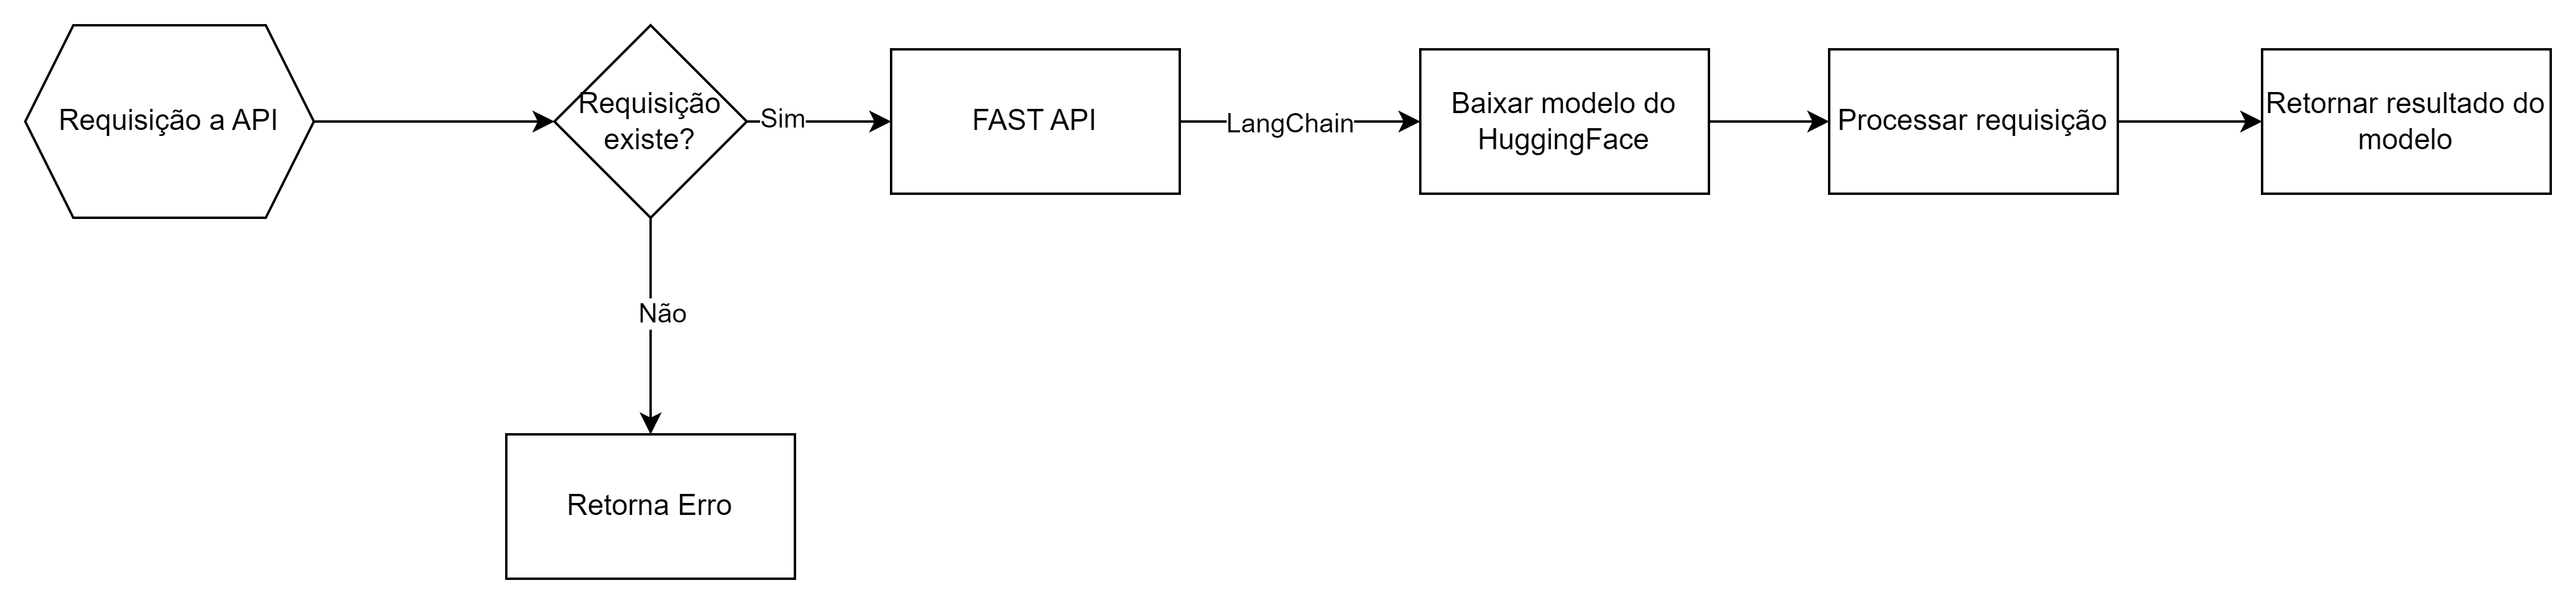

### 4. Com base na implementação da Questão 2 (Parte 2), explique as principais limitações de utilizar LangChain para integrar a API da OpenAI. 

Discuta os seguintes aspectos:

- Latência de resposta.
- Limites de uso da API da OpenAI.
- Desafios de escalabilidade e custo.
- Qualidade das traduções geradas em comparação com outros modelos.

**R.:**

*Latência:* O uso do LangChain implementa uma camada extra de processamento, gerando em um aumento no tempo de resposta se comparado a uma consulta direta a API.

*Limites da API:* Os limites de API (OpenAI ou Gemini) permanecem inalterados, usando ou não o LangChain, contudo, existe o risco de que, em fluxos mais complexos e não bem configurados, ocorra um consumo maior do que o ideal de tokens, atingindo os limites das API e/ou aumentando os custos da aplicação.

*Custos e escalabilidade:* Apesar do LangChain permitir organizar e orquestrar fluxos complexos de forma mais organizada, essa facilidade e organização podem implicar em maior custo, tanto computacional quanto financeiro.

*Qualidade:* A qualidade da tradução foi similar entre os dois modelos (local e gemini), contudo, o modelo local respondeu bem mais rapidamente e por um custo inferior, sendo então uma boa opção de baixo custo para esse tipo de tarefa.

### 5. Com base na aplicação desenvolvida na 3 (Parte 2), explique as limitações de usar LangChain para integrar o modelo HuggingFace de tradução

Discuta aspectos como:

- Desempenho e tempo de resposta.
- Consumo de recursos computacionais.
- Possíveis limitações no ajuste fino do modelo.
- Comparação com o uso direto da API HuggingFace.

**R.:** 

*Desempenho e consumo de recursos computacionais:* Devido ao langChain implementar uma camada intermediária para implementação de diferentes etapas na execução de 1 ou mais modelos, acarretando em um aumento no tempo para resposta e aumento no custo de recursos computacionais. Para a tradução de texto longo, a implementação via langchain gerou um aumento de 25% no tempo para a resposta.

*Ajustes Finos:* Langchain não é projetado para ajustes finos em modelos, precisando que o modelo seja preparado antecipadamente.

*Uso:* Para aplicações básicas e de poucas etapas, utilizar o huggingface diretamente é mais rápido e entrega um bom resultado, contudo, para aplicações com várias etapas e/ou integrações o LangChain se torna uma boa escolha por facilitar organizar e orquestrar as diferentes etapas e integrações em um fluxo de trabalho.

### 6. Com base nas questões 1-2 (Parte 1) e 2-3 (Parte 2), desenvolva uma tabela comparativa que aborde os seguintes critérios

- Facilidade de uso/configuração.
- Latência e desempenho.
- Flexibilidade para diferentes modelos.
- Custo e escalabilidade.
- Adequação para protótipos versus aplicações em produção.
- A comparação deve ser apresentada em formato de tabela, com colunas dedicadas a cada critério e linhas comparando FastAPI puro com LangChain.


### Comparação: **FastAPI puro** vs **LangChain**

| **Critério**                       | **FastAPI puro**              | **LangChain**                                                                |
|------------------------------------|-------------------------------|------------------------------------------------------------------------------|
| **Facilidade de uso/configuração** | Fácil para aplicações simples | Também fácil, mas melhor utilizado para aplicações com mais etapas/complexas |
| **Latência e desempenho**                 | Menor latência e melhor                       | Maior Latência e pior desempenho                 |                                                                              |
| **Flexibilidade para diferentes modelos** | Alta, permite utilizar qualquer modelo ou API | Média, permite menor customização e modificações |                                                                              |
| **Custo e escalabilidade**                | Por ser um acesso direto, sem intermediários, possui o menor custo possível  | Mais custoso, pois implementa uma ou mais camadas intermediárias
| **Adequação para protótipos**             | Bem adequada para aplicações de poucas etapas e/ou provas de conceito | Excelente para protótipos que necessitam de multiplas etapas                 |
| **Adequação para produção**               | Excelente devido ao menor custo, contudo, exigirá mais trabalho em fluxos complexos de múltiplas etapas | Pode ser excelente, se a aplicação necessitar de multiplas etapas que justiquem o aumento de custo |